In [28]:
import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [29]:
educacion = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_1_postulantes_educacion.csv')
genero_y_edad = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')
vistas = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_3_vistas.csv')
postulaciones = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_4_postulaciones.csv')
avisos_online = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_5_avisos_online.csv')
detalle_avisos = pd.read_csv('/home/rodrigo/Downloads/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

In [30]:
postulaciones.isnull().sum()

idaviso             0
idpostulante        0
fechapostulacion    0
dtype: int64

# Analizamos que sucede con la gente que solo tuvo una postulacion


In [31]:
cantidad_postulaciones_por_id = postulaciones['idpostulante'].value_counts()

In [32]:
cantidad_postulaciones_por_id.shape

(200888,)

In [33]:
ids_una_postulacion = pd.Series(cantidad_postulaciones_por_id)

In [34]:
ids_una_postulacion = ids_una_postulacion[ids_una_postulacion == 1]

In [35]:
ids_una_postulacion.value_counts()

1    19947
Name: idpostulante, dtype: int64

In [36]:
ids_una_postulacion = ids_una_postulacion.reset_index()

In [37]:
ids_una_postulacion.dtypes

index           object
idpostulante     int64
dtype: object

In [38]:
ids_una_postulacion.rename(columns={'index': 'idpostulante', 'idpostulante': 'cantidad'}, inplace=True)

In [39]:
del ids_una_postulacion['cantidad']

In [40]:
ids_una_postulacion

,idpostulante
0,ZD8lRGE
1,aGpaZq
2,ekNr2ao
3,VNJRdlM
4,50XYvM
5,jkj04WG
6,4rP5aV0
7,aKDrZm
8,YjQvMbX
9,Rzr33R9


Tenemos un DataFrame con los id de las personas que solo tuvieron una postulacion en nuestro set de datos

## Veamos el genero y edad  de las personas que se postulan poco

In [41]:
genero_edad_poca_postulacion = genero_y_edad.copy()

In [42]:
genero_edad_poca_postulacion.isnull().sum()

idpostulante          0
fechanacimiento    4750
sexo                  0
dtype: int64

In [43]:
genero_edad_poca_postulacion = genero_edad_poca_postulacion.dropna()

In [44]:
genero_edad_poca_postulacion.isnull().sum()

idpostulante       0
fechanacimiento    0
sexo               0
dtype: int64

In [45]:
genero_edad_poca_postulacion = pd.merge(genero_edad_poca_postulacion, ids_una_postulacion, on='idpostulante', how='inner')

In [46]:
genero_edad_poca_postulacion['fechanacimiento'] = pd.to_datetime(genero_edad_poca_postulacion['fechanacimiento'])

In [47]:
import datetime as datetime

In [48]:
now = pd.Timestamp(datetime.datetime.now())  

In [49]:
genero_edad_poca_postulacion['age'] = (now - genero_edad_poca_postulacion['fechanacimiento']).astype('timedelta64[Y]').astype(int)

Text(0,0.5,'Cantidad de postulantes')

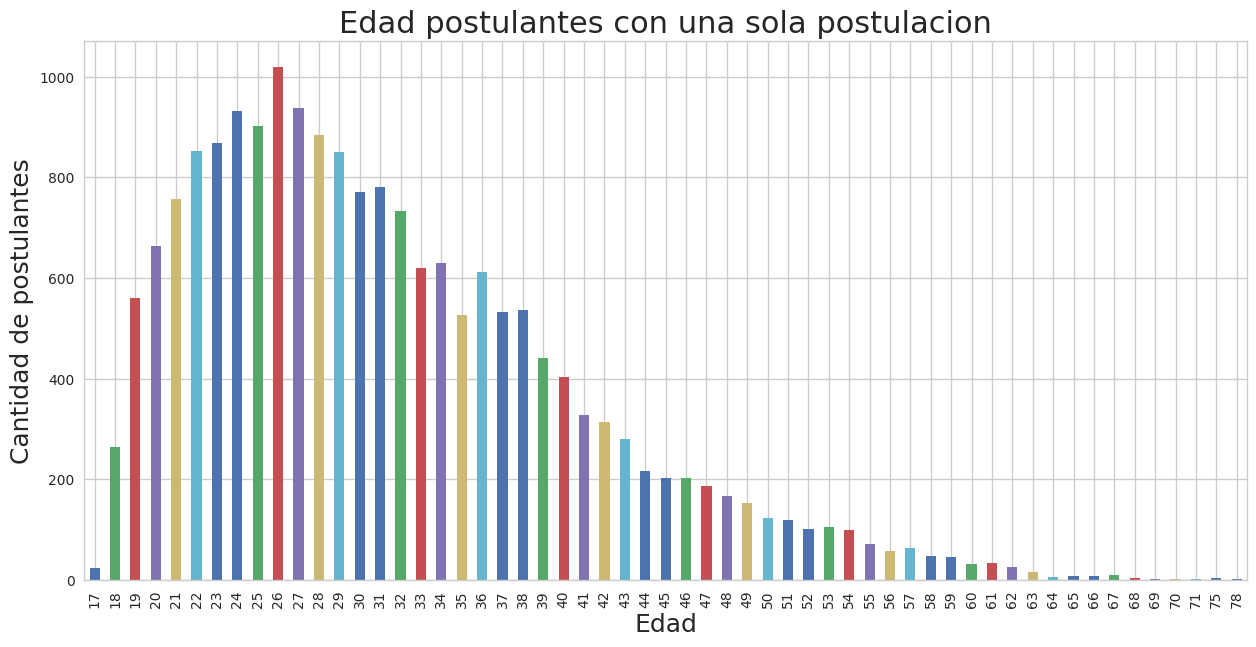

In [50]:
g = genero_edad_poca_postulacion['age'].value_counts().sort_index(ascending=True).plot.bar(figsize=(15,7))
g.set_title("Edad postulantes con una sola postulacion", fontsize=22)
g.set_xlabel("Edad",fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)

Text(0,0.5,'Cantidad de postulantes')

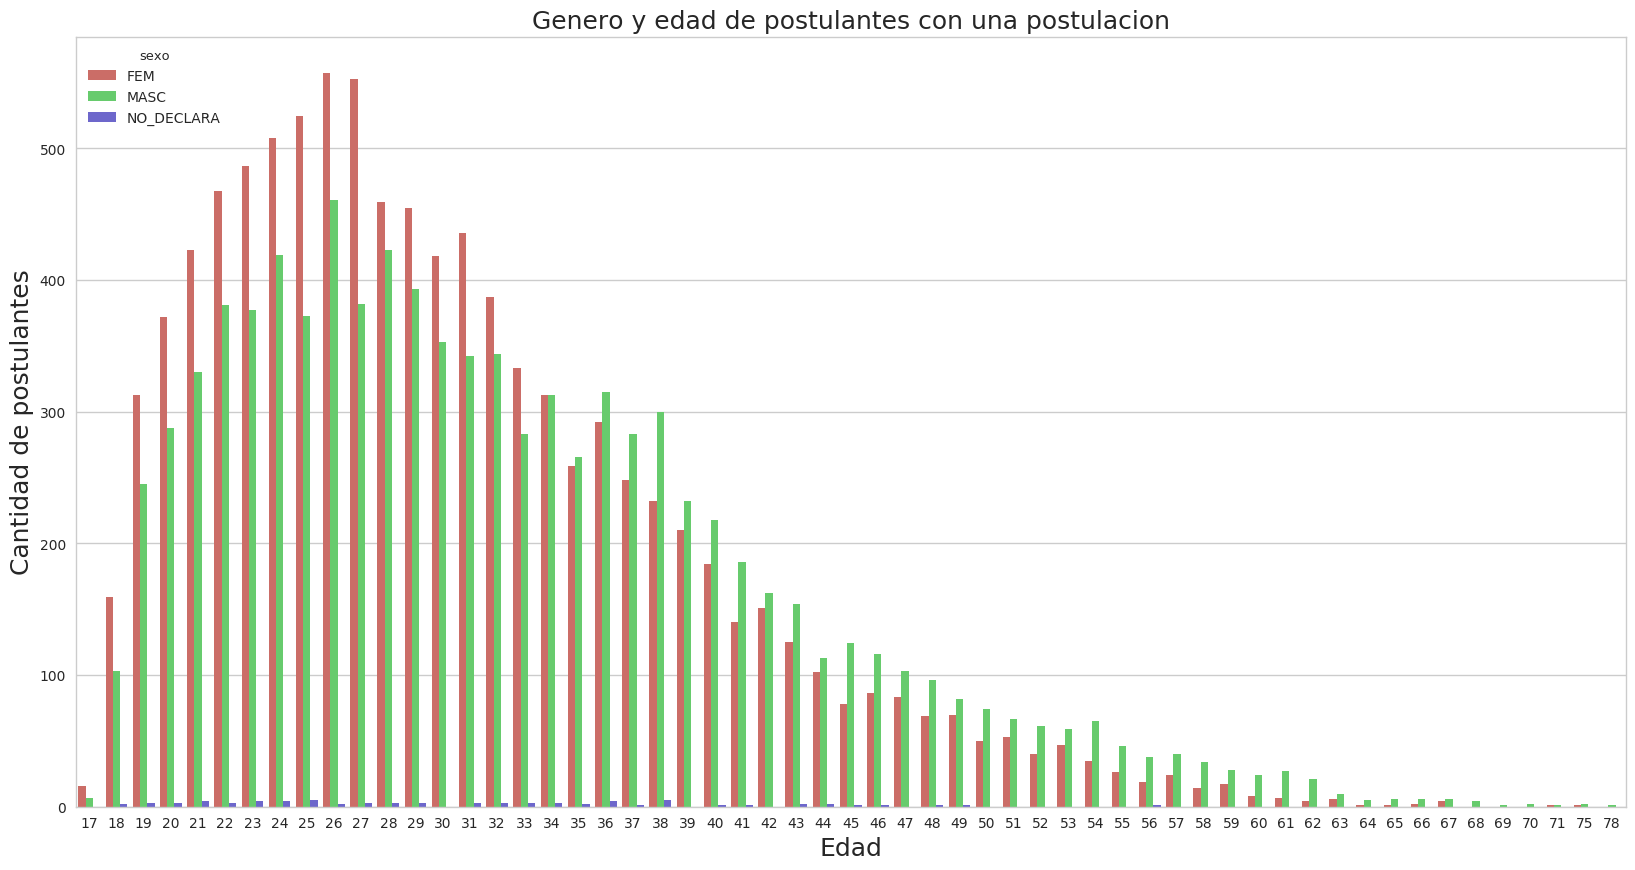

In [51]:


g = sns.countplot(x="age", hue="sexo", data=genero_edad_poca_postulacion, palette="hls")
g.set_title("Genero y edad de postulantes con una postulacion", fontsize=18)
g.set_xlabel("Edad", fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)

## Veamos la educacion de los postulantes que se postulan poco 

In [52]:
educacion.isnull().sum()

idpostulante    0
nombre          0
estado          0
dtype: int64

In [53]:
educacion_poca_postulacion = pd.merge(educacion, ids_una_postulacion, on='idpostulante', how='inner')

Text(0,0.5,'Cantidad de postulantes')

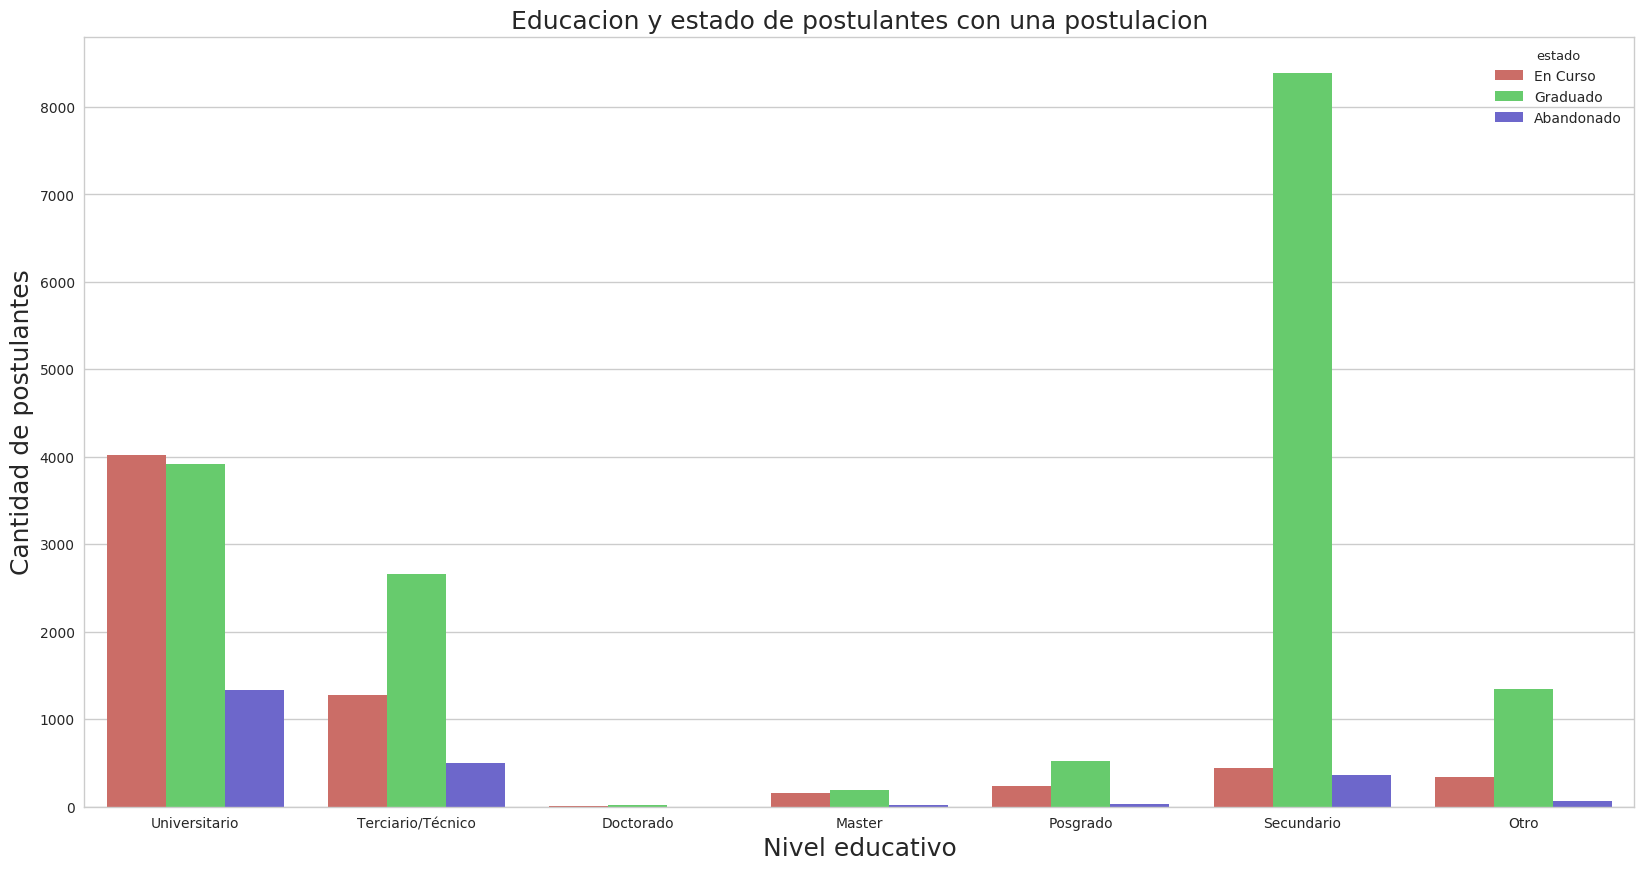

In [54]:
g = sns.countplot(x="nombre", hue="estado", data=educacion_poca_postulacion, palette="hls")
g.set_title("Educacion y estado de postulantes con una postulacion", fontsize=18)
g.set_xlabel("Nivel educativo", fontsize=18)
g.set_ylabel("Cantidad de postulantes", fontsize=18)